In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/AI/Datasets/class_fragments/class_fragments"

In [ ]:
# Get classes from dataset
classes = sorted(os.listdir(dataset_path))
num_classes = len(classes)

In [ ]:
# Load images and create lists for data
x_data, y_data = [], []

In [ ]:
# Loag images
for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)  # Image load
        image = cv2.resize(image, (32, 32))  # Resize
        x_data.append(image)
        y_data.append(class_idx)

In [ ]:
# Convert to NumPy array
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
print(f"Loaded {len(x_data)} imegis in {num_classes} classes")

Loaded 17397 imegis in 10 classes


In [ ]:
# Train-test data split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
# Convert 32x32x3 images to 1D vectors (size 3072)
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

In [ ]:
# KNN fit
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train_flat, y_train.ravel())

KNeighborsClassifier(metric='euclidean')

In [ ]:
import joblib
joblib.dump(knn, '/content/drive/MyDrive/AI/models/knn_model.pkl')

['/content/drive/MyDrive/AI/models/knn_model.pkl']

In [ ]:
# Prediction
y_pred = knn.predict(x_test_flat)

In [ ]:
# accuracy eval
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5417


In [ ]:
# Output metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       453
           1       0.81      0.55      0.65       637
           2       0.72      0.29      0.41       210
           3       0.64      0.26      0.37       226
           4       0.35      0.59      0.44       327
           5       0.49      0.41      0.45       236
           6       0.33      0.06      0.11       221
           7       0.42      0.82      0.56       243
           8       0.37      0.48      0.41       325
           9       0.68      0.70      0.69       602

    accuracy                           0.54      3480
   macro avg       0.54      0.49      0.47      3480
weighted avg       0.58      0.54      0.53      3480



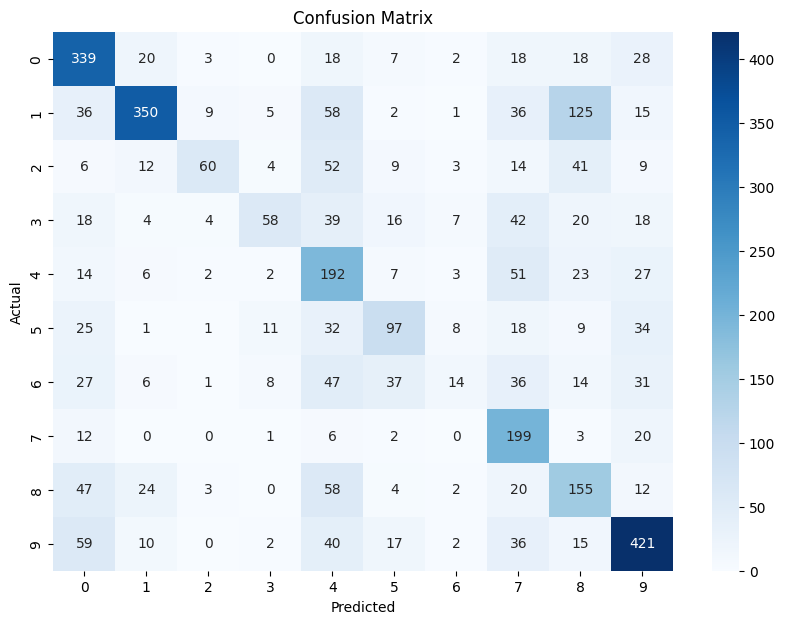

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

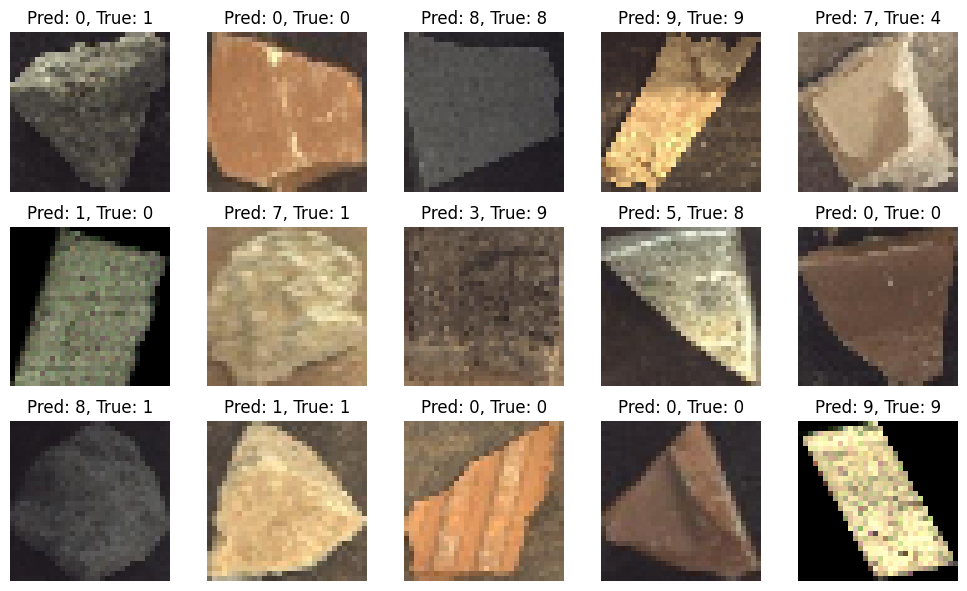

In [ ]:
# forecast visualization
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(x_test[i], cv2.COLOR_BGR2RGB))  # Convert BGR -> RGB
    ax.set_title(f'Pred: {y_pred[i]}, True: {y_test[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()